Lets work on 2D data to illustrate Polynomial Regression

### Import libraries 

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline



### Function that creates random data points

In [2]:

def make_data(N):
    # randomly sample the data
    r = np.random.RandomState(1)
    X = r.rand(N,1)**4
    y=-1/(X.ravel()+0.1) + (1 * r.randn(N))
    
    return X, y

X,y=make_data(100)
print(X.shape)
print(y.shape)

(100, 1)
(100,)


### Check the plot for higher degrees

Here in each loop you can adjust degree to see how it fits the plot

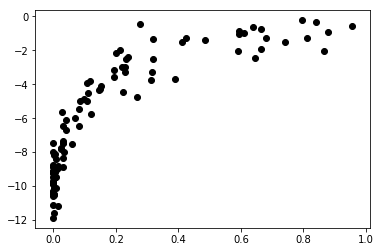

In [3]:
plt.scatter(X.ravel(), y, color='black',label="data")

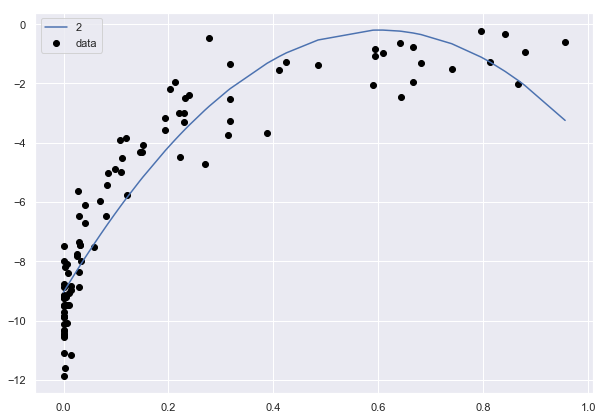

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
fig = plt.figure(figsize=(10,7))
plt.scatter(X.ravel(), y, color='black',label="data")

axis = plt.axis()
for degree in [2]:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly=poly_features.fit_transform(X)
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly, y)
    
    ## Good way is to create pipeline: 
    #https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html
    
    #lin_reg=make_pipeline(PolynomialFeatures(degree=degree, include_bias=False),LinearRegression())
    #lin_reg.fit(X,y)
    
    predicted=lin_reg.predict(x_poly)
    
    #predicted=lin_reg.predict(X)
    plt.plot(np.sort(X.ravel()), predicted[np.argsort(X.ravel())],label=str(degree))
    
plt.legend()

Higher Polynomials fits the training data very well than simple Linear Regression. 

Higher the polynomial, more complexity it will add to the model.

Comment on which polynomial you think is better? Which would work better on unseen dataset?

.....

### Underfitting, Overfitting and Generalization

#### Overfitting:

 Notice that the higher degree polynomial fits the data very well and makes the model more complex. This may work good for training data but may not work good for unseen data points. Complex Model is likely to detect patterns in noise itself. (Learn too much)


#### Underfitting

Its opposite of underfitting. It happens when your model is too simple to capture the trend. It may also not perform well on unseen data points (Learn Less)


#### Generalization

Good Model must be able to generalize from data so that it can perform well on any unseen dataset.

### As you have already fit the plot using degree 1, 2, 5 and 30. Comment which on polynomial do you think :
#### a) Overfits
#### b) Underfits
#### c) Generalize

........

In [5]:
def PolynomialRegression(degree=2):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression())

### For K Fold, we use builtin library of sklearn

In [8]:
from sklearn.model_selection import cross_val_score

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [9]:
cross_val_score(PolynomialRegression(), X, y, cv=5)

array([0.8269253 , 0.9233022 , 0.7996689 , 0.89632889, 0.75301407])

### For Validation Curve, we use builtin library of sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html

In [13]:
#from sklearn.learning_curve import validation_curve  -- for old version
from sklearn.model_selection import validation_curve

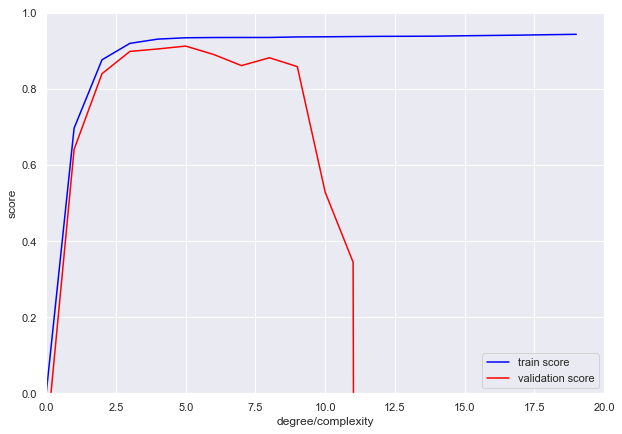

In [14]:
fig = plt.figure(figsize=(10,7))

degree = np.arange(0, 20)
#cv is for K fold cross validation
train_score, validation_score = validation_curve(PolynomialRegression(), X, y,'polynomialfeatures__degree', degree, cv=5)

plt.plot(degree, np.mean(train_score, 1), color='blue', label='train score')
plt.plot(degree, np.mean(validation_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlim(0, 20)
plt.xlabel('degree/complexity')
plt.ylabel('score');

In [15]:
train_score

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.69790623, 0.65598172, 0.69951465, 0.70209385, 0.72779687],
       [0.87717953, 0.85639894, 0.88805846, 0.86687721, 0.89296872],
       [0.92087964, 0.90779696, 0.92805122, 0.91228776, 0.92867481],
       [0.92889125, 0.92028259, 0.93836358, 0.9259679 , 0.9398105 ],
       [0.93048347, 0.92347942, 0.94103255, 0.93409187, 0.94185705],
       [0.93049223, 0.92348295, 0.94355893, 0.93477882, 0.94192   ],
       [0.93049968, 0.92384804, 0.9436812 , 0.93480478, 0.94200796],
       [0.93062359, 0.9238492 , 0.94369848, 0.93493964, 0.94201391],
       [0.93121316, 0.92565341, 0.943704  , 0.93851961, 0.94282213],
       [0.9316752 , 0.92636204, 0.94406194, 0.93897305, 0.94283112],
       [0.93277698, 0.92813348, 0.94406538, 0.93907512, 0.94283294],
       [0.93304345, 0.92828034, 0.94516959, 0.93955367, 0.94348346],
       [0.93305271, 0.92828585, 0.94552765, 0.94025486, 0.94351241],
       [0.9331339 , 0.92856692, 0.

Comment on why training score is higher everywhere?


...

Which polynomial this graph suggest should be selected?

...

Comment on bias variance tradeoff?

...

Validate from the plot if the polynomial you chose generalize well


### For Learning Curve, we use builtin library of sklearn

In [16]:
from sklearn.model_selection import learning_curve

In [17]:
train_sizes, train_errors, validation_errors = learning_curve(
                                                   estimator =  PolynomialRegression(5), X = X,
                                                   y = y,  cv = 7,
                                                   scoring = 'neg_mean_squared_error',train_sizes=np.linspace(0.01,1,num=10))

In [18]:
train_error_mean = -np.mean(train_errors,axis = 1)
validation_error_mean =-np.mean(validation_errors,axis = 1)

print('Mean training error\n\n', pd.Series(train_error_mean, index = train_sizes))
print('\n') # separator
print('\nMean validation error\n\n',pd.Series(validation_error_mean, index = train_sizes))

Mean training error

 1    -0.000000
10    0.129348
19    0.226794
28    0.397548
38    0.549205
47    0.551222
56    0.613410
66    0.708718
75    0.663789
85    0.790852
dtype: float64



Mean validation error

 1     1.816548e+01
10    1.524190e+12
19    3.178815e+05
28    1.270310e+00
38    1.092272e+00
47    1.020245e+00
56    9.515532e-01
66    9.656651e-01
75    9.717763e-01
85    9.636005e-01
dtype: float64


at degree =4 which is the best degree, low bias and low variance, if we decrease degree, high bias, low variance

(0, 6)

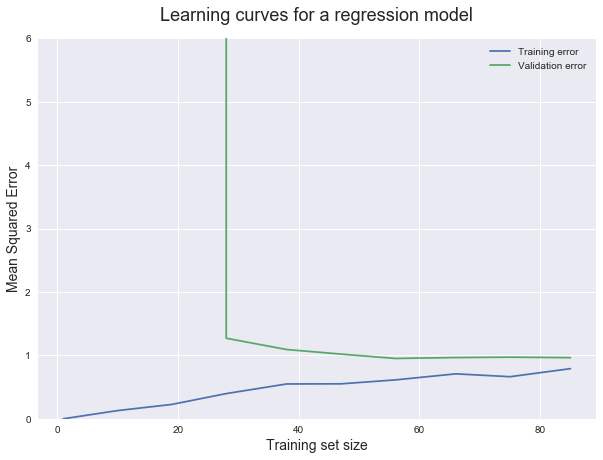

In [19]:
fig = plt.figure(figsize=(10,7))

plt.style.use('seaborn')

plt.plot(train_sizes, train_error_mean, label = 'Training error')
plt.plot(train_sizes, validation_error_mean, label = 'Validation error')

plt.ylabel('Mean Squared Error', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,6)

### For Grid Search, we use builtin library of sklearn

In [21]:
from sklearn.model_selection import GridSearchCV


In [22]:

param_grid = {'polynomialfeatures__degree': np.arange(20),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [23]:
grid.fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=7, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [24]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 5}

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
model=DecisionTreeRegressor(max_depth=4)

In [27]:
model.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [28]:
pred=model.predict(X)

In [29]:
from sklearn.tree import export_graphviz



In [30]:
export_graphviz(model, out_file='tree.dot', feature_names=['x'])


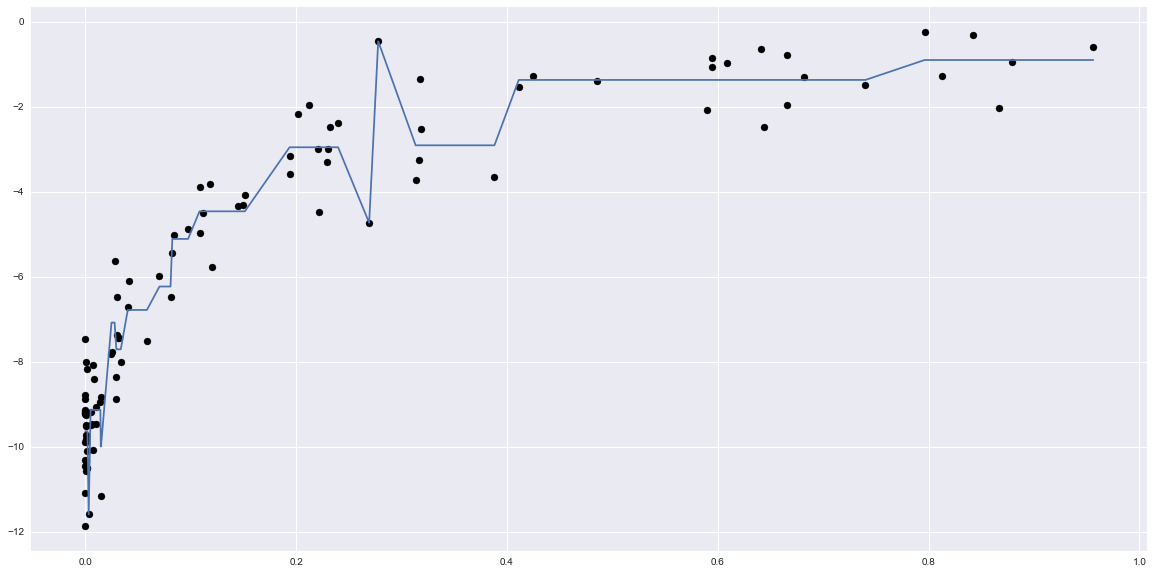

In [31]:
fig = plt.figure(figsize=(20,10))
plt.scatter(X.ravel(), y, color='black',label="data")
plt.plot( np.sort(X.ravel()), pred[np.argsort(X.ravel())])
#plt.plot(np.sort(X),pred)